0.031494965658089555


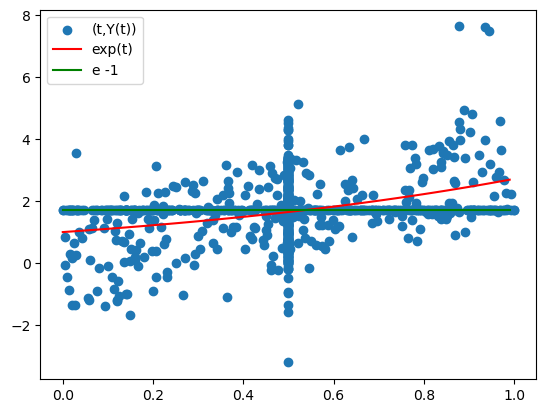

In [4]:
from random import random as U
from math import exp
import matplotlib.pyplot as plt
import numpy as np

def H(x): return 0 if x<0 else 1

points = []
def Y(t):
    sol = exp(1)-1 
    l = 2
    if U()*l<1:
        S = U()
        sol+= l*Y(S)*(H(t-S)+ S -1) 
    global points
    points += [(t,sol)]
    return sol

def sol(t,nsim): return sum(Y(t) for _ in range(nsim))/nsim

print((sol(0.5,6*10**2)-exp(0.5))/exp(0.5))
ll = np.arange(0,1,0.01)
pp = np.exp(ll)
qq= [exp(1)-1 for _ in ll]

x,y = zip(*points)
plt.scatter(x,y, label= "(t,Y(t))")
#plt.ylim(-3,6)
plt.plot(ll,pp,color ="red",label = "exp(t)")
plt.plot(ll,qq,color ="green", label="e -1")
plt.legend()
#plt.savefig("../../latex/main paper/plots/ydy int.png",dpi=300)
plt.show()



Stratified split version

0.0064097163813858484
-0.00212552952758167


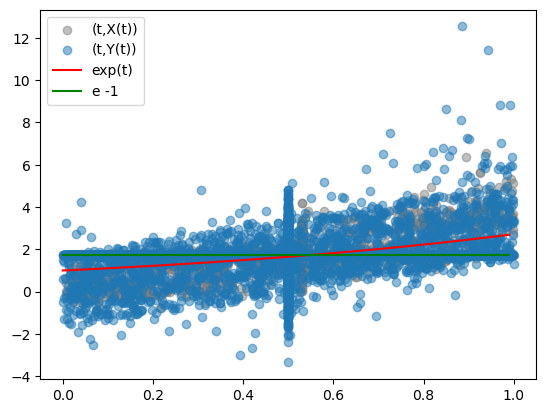

In [119]:
from random import random as U
from math import exp
import matplotlib.pyplot as plt
import numpy as np

def H(x): return 0 if x<0 else 1
def G(t,s): return H(t-s)+ s -1

points2 = []
def X(t1,t2):
    sol = np.array([exp(1)-1,exp(1)-1])
    if U()*2<1:
        S1,S2 = U()/2, (U()+1)/2
        GG = np.array([[G(t1,S1),G(t1,S2)],[G(t2,S1),G(t2,S2)]]) 
        sol += GG @ X(S1,S2) 
    global points2
    points2 += [(t1,sol[0]),(t2,sol[1])]
    return sol

def sol2(t,nsim): return sum(X(t,t) for _ in range(nsim))/nsim

print((sum(sol2(0.53,10**3))/2-exp(0.53))/exp(0.53))
ll = np.arange(0,1,0.01)
pp = np.exp(ll)
qq= [exp(1)-1 for _ in ll]

x,y = zip(*points2)
plt.scatter(x,y, label= "(t,X(t))", color = "grey",alpha=0.5)

def sol(t,nsim): return sum(Y(t) for _ in range(nsim))/nsim

points = []
print((sol(0.5,4*10**3)-exp(0.5))/exp(0.5))
x,y = zip(*points)
plt.scatter(x,y, label= "(t,Y(t))",alpha = 0.5)

#plt.ylim(-3,6)
plt.plot(ll,pp,color ="red",label = "exp(t)")
plt.plot(ll,qq,color ="green", label="e -1")
plt.legend()
#plt.savefig("../../latex/main paper/plots/ydy int.png",dpi=300)
plt.show()

This doesnt work
$$
G' = \delta(t-s), \int_{a}^{b}G(t,s)ds = 0 .
$$ 

$$
G(t,s,a,b)= H(t-s)+s-b.
$$ 



In [123]:
from math import exp

print(exp(0.5)-1)
print(exp(1)-exp(0.5))

0.6487212707001282
1.069560557758917


In [207]:
from random import random as U
from math import exp
import matplotlib.pyplot as plt
import numpy as np

def H(x): return 0 if x<0 else 1
def G(t,s,a,b): return H(t-s)+ s -b

def Y1(t,q1):
    sol = q1
    l = 2
    if U()*l<1:
        S= U()/2
        sol += 0.5*l*G(t,S,0,0.5)*Y1(S,q1)
    return sol

def Y2(t,q2):
    sol = q2
    l = 2
    if U()*l<1:
        S= (U()+1)/2
        sol += 0.5*l*G(t,S,0.5,1)*Y2(S,q2)
    return sol

def Q(nsim,l):
    sol = np.array([exp(1)-1,exp(1)-1])
    if U()*l<1:
        q1,q2 = Q(nsim,l)
        tmp1 =  sum(Y2((U()+1)/2,q2) for _ in range(nsim))/nsim
        tmp2 = sum(Y1(U()/2,q1) for _ in range(nsim))/nsim
        sol -= l*np.array([tmp1,tmp2])
    return sol

print(Q(100,1.01))

[2.62408797e+09 5.66957809e+09]
